In [22]:
from __future__ import print_function
import os
import matplotlib.pyplot as plt
import pylab as py
import re
import pickle
import numpy as np
from scipy.stats import chi2
%matplotlib inline

In [23]:
path2results='sidis_hermes_torino_alexei_dy'
# out
fig_kt_dy = "../Figs/kt_dy_torino.pdf"
fig_pt_pion_dy = "../Figs/pt_pion_dy_torino.pdf"
fig_pt_kaon_dy = "../Figs/pt_kaon_dy_torino.pdf"
fig_gk0_dy = "../Figs/gk0_dy_torino.pdf"
fig_Q0_dy = "../Figs/Q0_dy_torino.pdf"
fig_chi2_dy = "../Figs/chi2_dy_torino.pdf"
fig_points_dy = "../Figs/points_dy_torino.pdf"
fig_significance_dy = "../Figs/significance_dy_torino.pdf"

In [24]:
dystat = {'125':1.25,'15':1.5,'175':1.75,'2':2.,'225':2.25,'25':2.5,'275':2.75,'3':3.,'325':3.25,'35':3.5}

In [25]:
dy = np.zeros(len(dystat))
val = np.zeros(len(dystat))
valerr = np.zeros(len(dystat))
sea = np.zeros(len(dystat))
seaerr = np.zeros(len(dystat))
fav = np.zeros(len(dystat))
faverr = np.zeros(len(dystat))
unfav = np.zeros(len(dystat))
unfaverr = np.zeros(len(dystat))
kfav = np.zeros(len(dystat))
kfaverr = np.zeros(len(dystat))
kunfav = np.zeros(len(dystat))
kunfaverr = np.zeros(len(dystat))
gk0 = np.zeros(len(dystat))
gk0err = np.zeros(len(dystat))
#Q0 = np.zeros(len(dystat))
#Q0err = np.zeros(len(dystat))
chi2all = np.zeros(len(dystat))
pointsall = np.zeros(len(dystat))
significance = np.zeros(len(dystat))


i=0
for prefix in dystat.keys():
    with open(path2results+'/descriptive_torino_dy'+prefix+'.pkl', 'rb') as handle:
        stat = pickle.load(handle)
        dy[i] = stat['val'][0]
        val[i] = stat['val'][1]
        valerr[i] = stat['val'][2]
        sea[i] = stat['sea'][1]
        seaerr[i] = stat['sea'][2]
        fav[i] = stat['fav'][1]
        faverr[i] = stat['fav'][2]
        unfav[i] = stat['unfav'][1]
        unfaverr[i] = stat['unfav'][2]
        kfav[i] = stat['kfav'][1]
        kfaverr[i] = stat['kfav'][2]
        kunfav[i] = stat['kunfav'][1]
        kunfaverr[i] = stat['kunfav'][2]
        gk0[i] = stat['gk0'][1]
        gk0err[i] = stat['gk0'][2]
        #Q0[i] = stat['Q0'][1]
        #Q0err[i] = stat['Q0'][2]
        chi2all[i]=stat['chi2'][1]
        pointsall[i]=stat['chi2'][2]-7.
        significance[i]=chi2.cdf(chi2all[i], pointsall[i], loc=0, scale=1)*100
        i=i+1

In [26]:
chi2.cdf(800., 800., loc=0, scale=1)

0.50664912983890542

In [27]:
print(chi2.cdf(chi2all[9], pointsall[9], loc=0, scale=1))
print(chi2all[9], pointsall[9])

0.242681017291
289.39 307.0


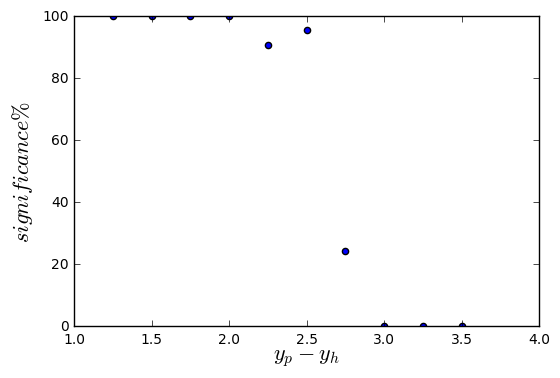

In [28]:
fig, ax = plt.subplots()
ax.set_ylabel(r"$significance \%$", size=16)
ax.set_xlabel(r"$y_p-y_h$",labelpad=1, size=16)

ax.scatter(dy,significance)

plt.ylim([0,100.])

py.savefig("%s" % (fig_significance_dy))

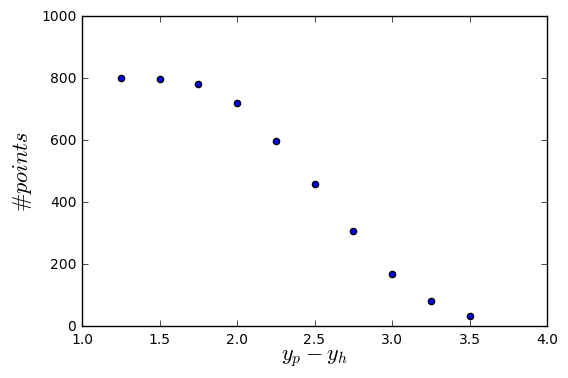

In [29]:
fig, ax = plt.subplots()
ax.set_ylabel(r"$\# points$", size=16)
ax.set_xlabel(r"$y_p-y_h$",labelpad=1, size=16)

ax.scatter(dy,pointsall)

plt.ylim([0,1000.])

py.savefig("%s" % (fig_points_dy))

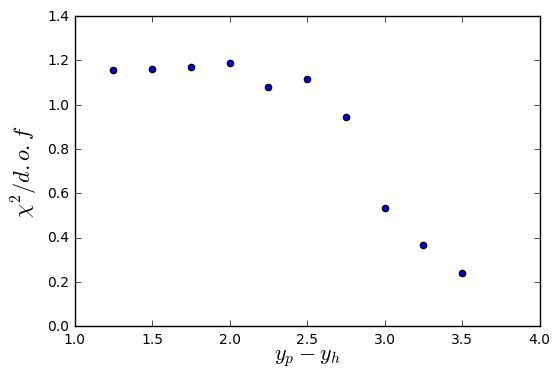

In [30]:
fig, ax = plt.subplots()
ax.set_ylabel(r"$\chi^2/d.o.f$", size=16)
ax.set_xlabel(r"$y_p-y_h$",labelpad=1, size=16)

ax.scatter(dy, chi2all/pointsall)

#plt.ylim([0,0.8])

py.savefig("%s" % (fig_chi2_dy))

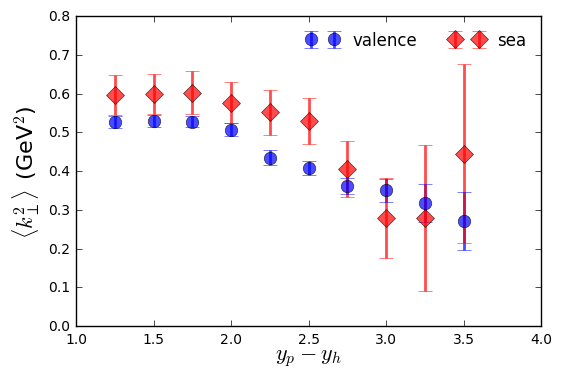

In [31]:
fig, ax = plt.subplots()
ax.set_ylabel(r"$\langle k_\perp^2 \rangle_{} $ (GeV$^2$)", size=16)
ax.set_xlabel(r"$y_p-y_h$",labelpad=1, size=16)

ax.errorbar(dy, val, valerr, capsize=5, fmt="o",color="blue", alpha=0.7, linewidth=2, markersize=9)
ax.errorbar(dy, sea, seaerr, capsize=5, fmt="D",color="red", alpha=0.7, linewidth=2, markersize=9)

plt.ylim([0,0.8])
plt.xlim([1,4.])

ax.legend(["valence", "sea"], loc="best", ncol=2, fontsize="large",frameon=False)
py.savefig("%s" % (fig_kt_dy))

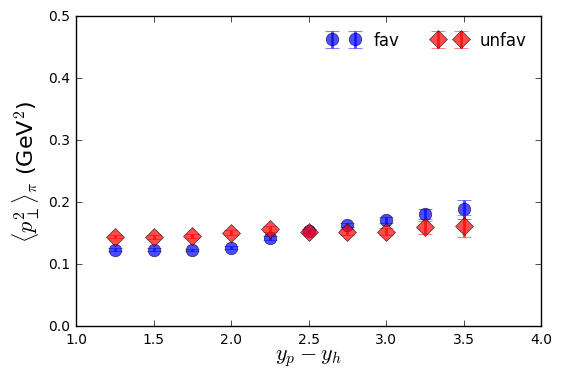

In [32]:
fig, ax = plt.subplots()
ax.set_ylabel(r"$\langle p_\perp^2 \rangle_{\pi} $ (GeV$^2$)", size=16)
ax.set_xlabel(r"$y_p-y_h$",labelpad=1, size=16)

ax.errorbar(dy, fav, yerr=faverr, capsize=5, fmt="o",color="blue", alpha=0.7, linewidth=2, markersize=9)
ax.errorbar(dy, unfav, yerr=unfaverr, capsize=5, fmt="D",color="red", alpha=0.7, linewidth=2, markersize=9)

plt.ylim([0,0.5])
plt.xlim([1,4.])

ax.legend(["fav", "unfav"], loc="best", ncol=2, fontsize="large",frameon=False)
py.savefig("%s" % (fig_pt_pion_dy))


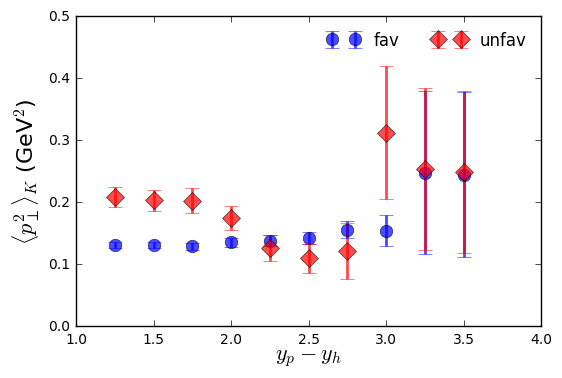

In [33]:
fig, ax = plt.subplots()
ax.set_ylabel(r"$\langle p_\perp^2 \rangle_{K} $ (GeV$^2$)", size=16)
ax.set_xlabel(r"$y_p-y_h$",labelpad=1, size=16)

ax.errorbar(dy, kfav, yerr=kfaverr, capsize=5, fmt="o",color="blue", alpha=0.7, linewidth=2, markersize=9)
ax.errorbar(dy, kunfav, yerr=kunfaverr, capsize=5, fmt="D",color="red", alpha=0.7, linewidth=2, markersize=9)

plt.ylim([0,0.5])
plt.xlim([1,4.])

ax.legend(["fav", "unfav"], loc="best", ncol=2, fontsize="large",frameon=False)
py.savefig("%s" % (fig_pt_kaon_dy))


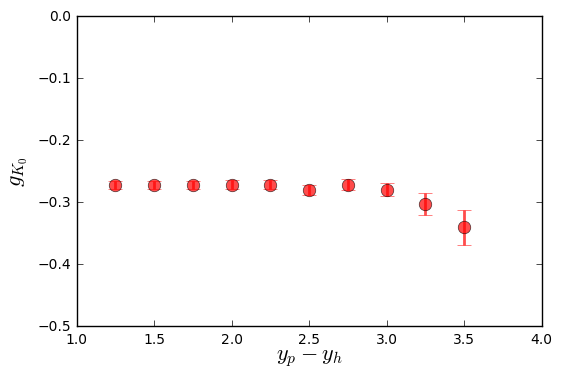

In [35]:
fig, ax = plt.subplots()
ax.set_ylabel(r"$g_{K_0} $", size=16)
ax.set_xlabel(r"$y_p-y_h$",labelpad=1, size=16)

ax.errorbar(dy, gk0, yerr=gk0err, capsize=5, fmt="o",color="red", alpha=0.7, linewidth=2, markersize=9)

plt.ylim([-0.5,0.])
plt.xlim([1,4.])

py.savefig("%s" % (fig_gk0_dy))